In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[imdb dataset from Kaggle](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset) (free account required)

Stored as `movie_metadata.csv`

In [2]:
movie_data = pd.read_csv("movie_metadata.csv")

In [3]:
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie_data_new = movie_data["genres"].str.split("|", expand=True)
movie_data_new.head()

,0,1,2,3,4,5,6,7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
4,Documentary,None,None,None,None,None,None,None


In [5]:
movie_data_new = movie_data_new.stack()
movie_data_new.head(10)

0  0       Action
   1    Adventure
   2      Fantasy
   3       Sci-Fi
1  0       Action
   1    Adventure
   2      Fantasy
2  0       Action
   1    Adventure
   2     Thriller
dtype: object

In [6]:
movie_data_new = movie_data_new.reset_index(level=0)
movie_data_new.head()

,level_0,0
0,0,Action
1,0,Adventure
2,0,Fantasy
3,0,Sci-Fi
0,1,Action


In [7]:
movie_data_new = movie_data_new.set_index('level_0')
movie_data_new.head()

,0
level_0,
0,Action
0,Adventure
0,Fantasy
0,Sci-Fi
1,Action


In [8]:
movie_data_new = movie_data_new.rename(columns = {0: "genres"})
movie_data_new.head()

,genres
level_0,
0,Action
0,Adventure
0,Fantasy
0,Sci-Fi
1,Action


In [9]:
movie_data_new = movie_data_new.join(movie_data.drop('genres', axis=1), how="left")
movie_data = movie_data_new
movie_data.head()

,genres,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Action,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
0,Adventure,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
0,Fantasy,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
0,Sci-Fi,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Action,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [10]:
movie_data.index = movie_data.index + 1

In [11]:
movie_data.index.name = "ID"
movie_data.head()

,genres,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
ID,,,,,,,,,,,,,,,,,,,,,
1,Action,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Adventure,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Fantasy,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Sci-Fi,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
2,Action,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


Modified from https://stackoverflow.com/questions/39078282/normalizing-data-by-duplication/39078508#39078508

Top 20 actors based of average imdb score

In [12]:
top_directors = (movie_data
                 .groupby("director_name", as_index=False)['imdb_score'].mean()
                 .sort_values(by='imdb_score', ascending=False))

top_directors.head(20)

,director_name,imdb_score
1084,John Blanchard,9.500000
2011,Sadyk Sher-Niyaz,8.700000
1620,Mitchell Altieri,8.700000
299,Cary Bell,8.700000
1606,Mike Mayhall,8.600000
315,Charles Chaplin,8.600000
1835,Raja Menon,8.500000
1979,Ron Fricke,8.500000
428,Damien Chazelle,8.500000
1417,Majid Majidi,8.500000


Return director with highest imdb score

In [13]:
# Idxmax returns an index number to feed into loc
top_directors.loc[top_directors["imdb_score"].idxmax, "director_name"]

'John Blanchard'

Get max average imdb score across all genres.

In [14]:
genres_invest = (movie_data
                 .groupby("genres", as_index=False)["imdb_score"]
                 .mean()
                 .sort_values(by="imdb_score", ascending=False))

genres_invest

,genres,imdb_score
10,Film-Noir,7.633333
17,News,7.533333
6,Documentary,7.180165
3,Biography,7.150171
12,History,7.083575
24,War,7.070423
7,Drama,6.763763
25,Western,6.689691
22,Sport,6.606044
2,Animation,6.576033


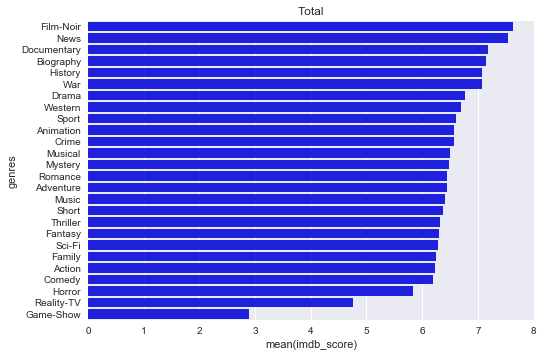

In [15]:
sns.barplot(y="genres",
            x="imdb_score",
            color="blue",
            orient="h",
            data=genres_invest,
           )
sns.plt.title("Total")
sns.plt.savefig("genre_score.png")